In [ ]:
#Нейро-нечеткие системы
#Лабораторная работа №1

#Задача: выбрать датасет и визуализировать его

In [4]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Select, SelectMultiple,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from windrose import WindroseAxes
from matplotlib import cm

In [5]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('Anatase UV.csv', 'avocado.csv', 'cancer_b.csv', 'cancer_m.csv', '…

In [16]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


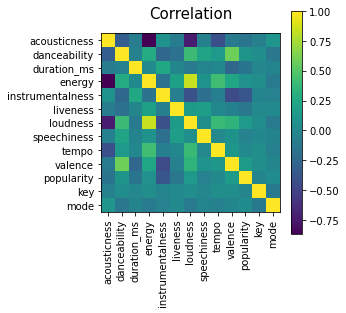

In [17]:
#корреляция 
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

In [18]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля розы: ',
    disabled=False
)

In [19]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Скорость ветров: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
 Box([Label(value='Направления ветров: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Скорость ветров: '), Select(options=('acousticness', 'danceability', …

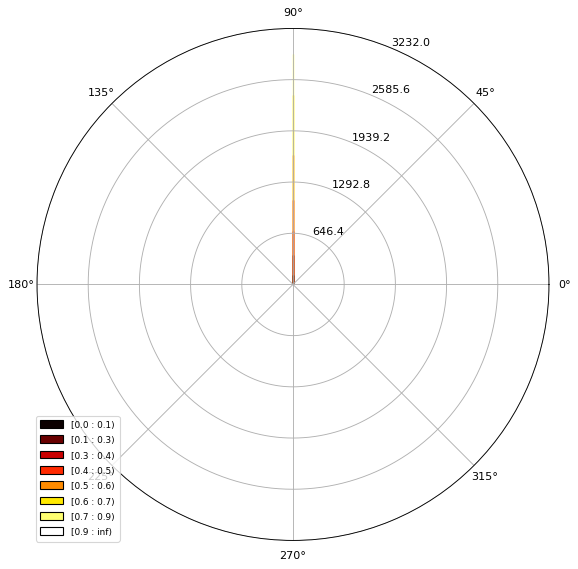

In [23]:
#роза ветров
#energy&mode
left = form.children[0].children[1].value
right = form.children[1].children[1].value
ws = df[left]
wd = df[right]*360

#ws /= ws.max()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(ws.min(), ws.max(), (ws.max()-ws.min())/8), cmap=cm.hot)
ax.set_legend()

In [25]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])

oneSelect = Select(
        options=list(ddf.columns),
        value=list(ddf.columns)[0],
        description='Выберите поле:',
        disabled=False
    )
oneSelect

Select(description='Выберите поле:', options=('acousticness', 'danceability', 'duration_ms', 'energy', 'instru…

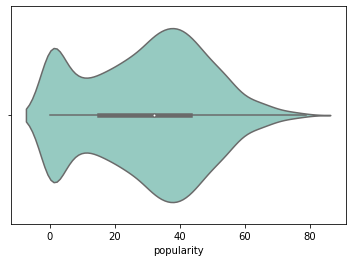

In [28]:
#Виолин
left = oneSelect.value
ax = sns.violinplot(x=left,
                    data=df,
                    scale="width", palette="Set3", dodge=False)

In [29]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля парного сочетания: ',
    disabled=False
)
select



SelectMultiple(description='Поля парного сочетания: ', index=(0,), options=('acousticness', 'danceability', 'd…

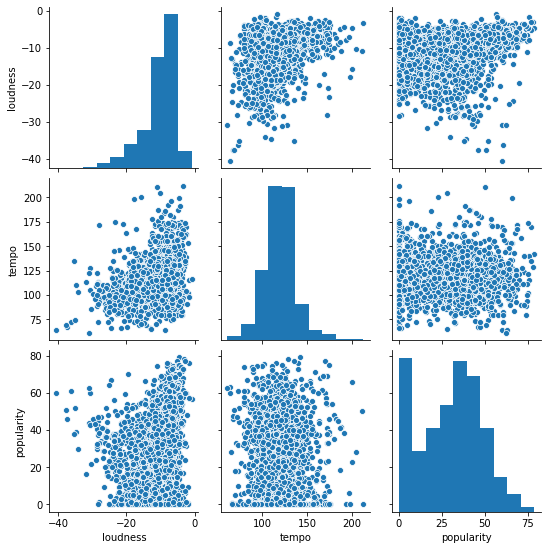

In [30]:
#все возможные пары (тут хорошо видно кластеры)
ddf = df[list(select.value)]
sns.pairplot(ddf)

In [ ]:
#выбрать стратифицированную выборку 
#pca посмотреть